In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from navec import Navec
from slovnet import NER
from ipymarkup import show_span_ascii_markup as show_markup

In [2]:
news = pd.read_csv('../data/raw/news.csv', parse_dates=['publication_date'])

In [3]:
# https://github.com/natasha/slovnet
navec = Navec.load('../data/bin/navec_news_v1_1B_250K_300d_100q.tar')
ner = NER.load('../data/bin/slovnet_ner_news_v1.tar')
ner.navec(navec)

NER(
    infer=NERInfer(
        model=NER(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                        array

In [4]:
def deconstruct_markup(news_id, markup):
    
    markup_data = []
    
    for index, span in enumerate(markup.spans):
        span_text = markup.text[span.start:span.stop]
        
        markup_data.append({'news_id': news_id
                           ,'span_number': index+1
                           ,'span_text': span_text
                           ,'span_start': span.start
                           ,'span_stop': span.stop
                           ,'span_type': span.type})
        
    return markup_data

In [5]:
def ner_processing(dataframe, column = 'title'):
    ner_data = []

    for index, row in dataframe.iterrows():
        news_id = row['news_id']
        text = row[column]
        #print(f'index: {index}')
        if text is None or text.strip() == '':
            continue
        else:
            
            markup = ner(text)

            markup_data = deconstruct_markup(news_id, markup)

            ner_data.extend(markup_data)

            #show_markup(markup.text, markup.spans)
        
    news_ner = pd.DataFrame(ner_data)
    
    return news_ner

In [6]:
news_ner_title = ner_processing(news, column='title')

In [7]:
news_ner_org = news_ner_title[(news_ner_title['span_type'] == 'ORG') & (news_ner_title['span_text'] != 'рбк')]

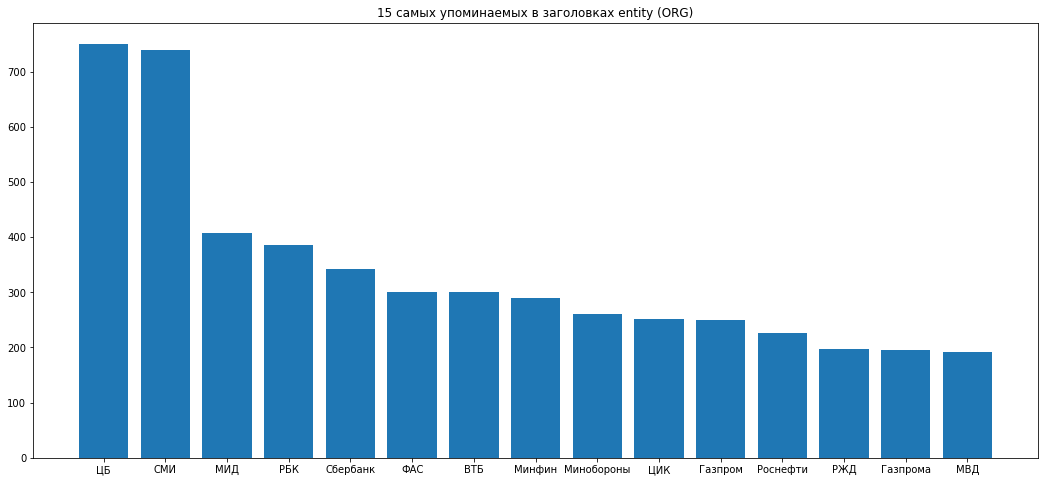

In [20]:
top_15_org = news_ner_org['span_text'].value_counts()[:15]
top_15_org_name = list(top_15_org.index)
top_15_org_count = list(top_15_org.values)

fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(top_15_org_name, top_15_org_count)
ax.set_xticks(top_15_org_name)
ax.set_title('15 самых упоминаемых в заголовках entity (ORG)')

plt.show()